In [125]:
from PIL import Image
from pathlib import Path

In [469]:
data_path =  "./data/raw"
image_dir = "./data/raw/train/images/"
mask_dir = "./data/raw/train/masks"
labels_path = "./data/raw/labels.txt"

In [470]:
img_files  = list(Path(image_dir).glob("*.jpg"))
mask_files = list(Path(mask_dir).glob("*.png"))
assert len(img_files) == len(mask_files)
mask_names = []
with open(str(labels_path),"r") as f:
    mask_names = [line.strip() for line in f]

In [471]:
def get_imagepair_paths(idx = 1):
    img_file_name =  img_files[idx] 
    mask_file_name = str(img_file_name.stem) + '.png'
    mask_file_name = Path(mask_dir) / mask_file_name
    return str(img_file_name), str(mask_file_name)

img_file_name, mask_file_name = get_imagepair_paths(idx = 1)

In [473]:
# checking mask images 
import pandas as pd
from tqdm import tqdm
from skimage import  io
import sys
df_train_mask = pd.DataFrame(columns = ['img_rgb', 'img_mask', 'label_min', 'label_max', 'label_unique','label_id_list'])
# for i in len(mask_files):
total_sample_number = len(img_files)
# total_sample_number = 10 # small number for debuging
with tqdm(total=total_sample_number, file=sys.stdout) as pbar:
    for i in range(total_sample_number):
        prgb, p = get_imagepair_paths(i)
        mask = io.imread(p)
        mask_min= np.min(mask)
        mask_max= np.max(mask)
        mask_unique_elements = np.unique(mask)
        mask_unique_number = len(mask_unique_elements)
        one_record = [str(prgb), str(p), mask_min, mask_max, mask_unique_number, mask_unique_elements]
        df_train_mask.loc[i] = one_record
        pbar.set_description('processed: %d' % (1 + i))
        pbar.update(1)
df_train_mask.head()


processed: 320: 100%|██████████| 320/320 [02:10<00:00,  2.45it/s]


img_rgb                      img_mask label_min  \
0  data/raw/train/images/162.jpg  data/raw/train/masks/162.png         0   
1  data/raw/train/images/176.jpg  data/raw/train/masks/176.png         0   
2  data/raw/train/images/348.jpg  data/raw/train/masks/348.png         0   
3  data/raw/train/images/406.jpg  data/raw/train/masks/406.png         0   
4  data/raw/train/images/412.jpg  data/raw/train/masks/412.png         0   

  label_max label_unique                                      label_id_list  
0        22           12          [0, 1, 2, 3, 4, 6, 8, 13, 14, 15, 18, 22]  
1        22           18  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15...  
2        22           16  [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 1...  
3        15            4                                      [0, 2, 3, 15]  
4        22           14   [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 15, 19, 22]

In [551]:
df_train_mask.shape[0]

320

In [544]:
prgb = str(img_files[0])
img_np = io.imread(prgb)
img_np.shape

(4000, 6000, 3)

In [545]:
df_train_mask.head()

img_rgb                      img_mask label_min  \
0  data/raw/train/images/322.jpg  data/raw/train/masks/322.png         0   
1  data/raw/train/images/461.jpg  data/raw/train/masks/461.png         0   
2  data/raw/train/images/016.jpg  data/raw/train/masks/016.png         0   
3  data/raw/train/images/103.jpg  data/raw/train/masks/103.png         0   
4  data/raw/train/images/514.jpg  data/raw/train/masks/514.png         0   

  label_max label_unique                                      label_id_list  
0        22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...  
1        22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2        22           19  [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15...  
3        22           19  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...  
4        22           19  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,...

In [548]:
pos = int(total_sample_number * 0.75)
df_train_mask.loc[:pos-1, ]  

img_rgb                      img_mask label_min  \
0    data/raw/train/images/322.jpg  data/raw/train/masks/322.png         0   
1    data/raw/train/images/461.jpg  data/raw/train/masks/461.png         0   
2    data/raw/train/images/016.jpg  data/raw/train/masks/016.png         0   
3    data/raw/train/images/103.jpg  data/raw/train/masks/103.png         0   
4    data/raw/train/images/514.jpg  data/raw/train/masks/514.png         0   
..                             ...                           ...       ...   
235  data/raw/train/images/326.jpg  data/raw/train/masks/326.png         0   
236  data/raw/train/images/329.jpg  data/raw/train/masks/329.png         0   
237  data/raw/train/images/347.jpg  data/raw/train/masks/347.png         0   
238  data/raw/train/images/381.jpg  data/raw/train/masks/381.png         0   
239  data/raw/train/images/403.jpg  data/raw/train/masks/403.png         0   

    label_max label_unique                                      label_id_list  
0          22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...  
1          22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2          22           19  [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15...  
3          22           19  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...  
4          22           19  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,...  
..        ...          ...                                                ...  
235        22           10                [0, 1, 2, 3, 8, 13, 14, 15, 21, 22]  
236        22           10               [0, 1, 2, 3, 13, 14, 15, 18, 21, 22]  
237        22           10                  [0, 1, 2, 4, 6, 8, 9, 11, 15, 22]  
238        22           10                 [0, 2, 3, 4, 8, 9, 13, 19, 20, 22]  
239        22           10                [0, 1, 2, 4, 8, 10, 13, 15, 19, 22]  

[240 rows x 6 columns]

In [549]:
df_train_mask.loc[pos:, ]  

img_rgb                      img_mask label_min  \
240  data/raw/train/images/430.jpg  data/raw/train/masks/430.png         0   
241  data/raw/train/images/433.jpg  data/raw/train/masks/433.png         0   
242  data/raw/train/images/444.jpg  data/raw/train/masks/444.png         0   
243  data/raw/train/images/451.jpg  data/raw/train/masks/451.png         0   
244  data/raw/train/images/454.jpg  data/raw/train/masks/454.png         0   
..                             ...                           ...       ...   
315  data/raw/train/images/098.jpg  data/raw/train/masks/098.png         2   
316  data/raw/train/images/146.jpg  data/raw/train/masks/146.png         0   
317  data/raw/train/images/406.jpg  data/raw/train/masks/406.png         0   
318  data/raw/train/images/561.jpg  data/raw/train/masks/561.png         0   
319  data/raw/train/images/420.jpg  data/raw/train/masks/420.png         0   

    label_max label_unique                         label_id_list  
240        22           10  [0, 1, 2, 3, 13, 14, 15, 18, 21, 22]  
241        22           10     [0, 1, 2, 3, 4, 6, 8, 15, 18, 22]  
242        22           10     [0, 1, 2, 4, 6, 8, 9, 15, 18, 22]  
243        22           10   [0, 1, 2, 3, 8, 10, 11, 14, 15, 22]  
244        22           10    [0, 1, 2, 3, 4, 8, 15, 19, 21, 22]  
..        ...          ...                                   ...  
315        22            4                        [2, 3, 15, 22]  
316        15            4                         [0, 2, 3, 15]  
317        15            4                         [0, 2, 3, 15]  
318        22            3                            [0, 1, 22]  
319         3            2                                [0, 3]  

[80 rows x 6 columns]

In [505]:
df_train_mask = df_train_mask.sort_values(by=['label_unique', 'img_rgb'], ascending=[False, True])

In [506]:
df_train_mask.reset_index(drop=True, inplace=True)

In [507]:
df_train_mask['label_unique'].max()
df_train_mask['label_max'].max()



22

In [508]:
df_train_mask.to_csv('./reports/df_data.csv', index=False)

In [509]:

df_train_mask.head()



img_rgb                      img_mask label_min  \
0  data/raw/train/images/322.jpg  data/raw/train/masks/322.png         0   
1  data/raw/train/images/461.jpg  data/raw/train/masks/461.png         0   
2  data/raw/train/images/016.jpg  data/raw/train/masks/016.png         0   
3  data/raw/train/images/103.jpg  data/raw/train/masks/103.png         0   
4  data/raw/train/images/514.jpg  data/raw/train/masks/514.png         0   

  label_max label_unique                                      label_id_list  
0        22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...  
1        22           22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2        22           19  [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15...  
3        22           19  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...  
4        22           19  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,...

<AxesSubplot:>

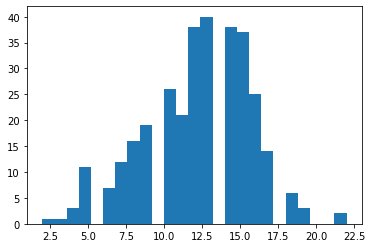

In [515]:
df_train_mask['label_unique'].hist(bins = 25, grid = False)

In [516]:
img_file_name, mask_file_name =  df_train_mask['img_rgb'][0], df_train_mask['img_mask'][0]

In [517]:
def preprocess(pil_img, scale=1): 
    """convert pillow image to np array"""
    w, h = pil_img.size
    newW, newH = int(scale * w), int(scale * h)
    assert newW > 0 and newH > 0, 'Scale is too small'
    pil_img = pil_img.resize((newW, newH))

    img_nd = np.array(pil_img)

    if len(img_nd.shape) == 2:
        img_nd = np.expand_dims(img_nd, axis=2)

#     # HWC to CHW
#     img_trans = img_nd.transpose((2, 0, 1))
#     if img_trans.max() > 1:
#         img_trans = img_trans / 255
    return img_nd

In [518]:
img = Image.open(img_file_name)
mask = Image.open(mask_file_name)
assert mask.size == img.size 

img_np =  preprocess(img)
mask_np = preprocess(mask)
print(img_np.shape, mask_np.shape)

(4000, 6000, 3) (4000, 6000, 1)


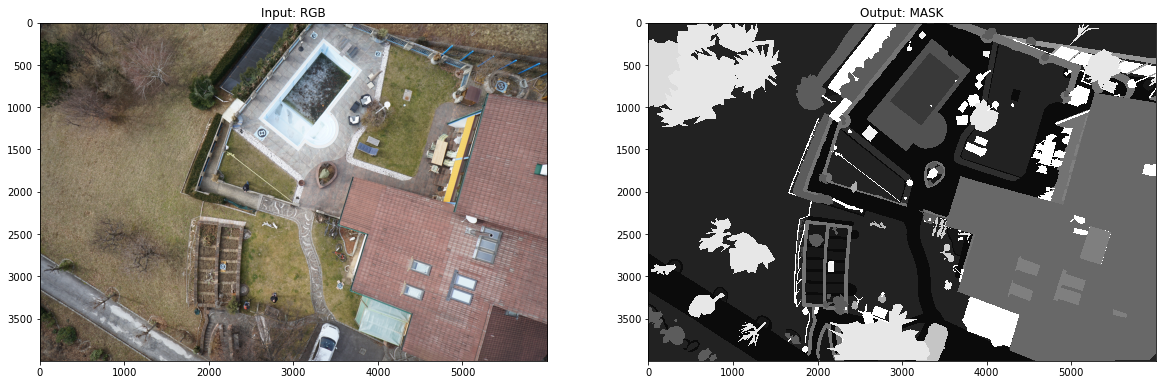

In [542]:
def plot_image_pair(pil_img, pil_mask, cmap='gray', save_dir = 'reports/figures'):
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    %matplotlib inline
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
#     fig.suptitle(f'Image Segmentation Sample: {img_file_name}')
    ax1.set_title('Input: RGB')
    ax1.imshow(pil_img)
    im = ax2.imshow(pil_mask,  cmap=plt.cm.get_cmap(cmap, 23),  interpolation='none')
    ax2.set_title('Output: MASK')
#     fig.colorbar(im , ax = ax2)
    plt.savefig(save_dir + '/image_pair_'+cmap+'.png', dpi=200, bbox_inches='tight', pad_inches=0)
    plt.show()

plot_image_pair(img, mask, cmap='gray')

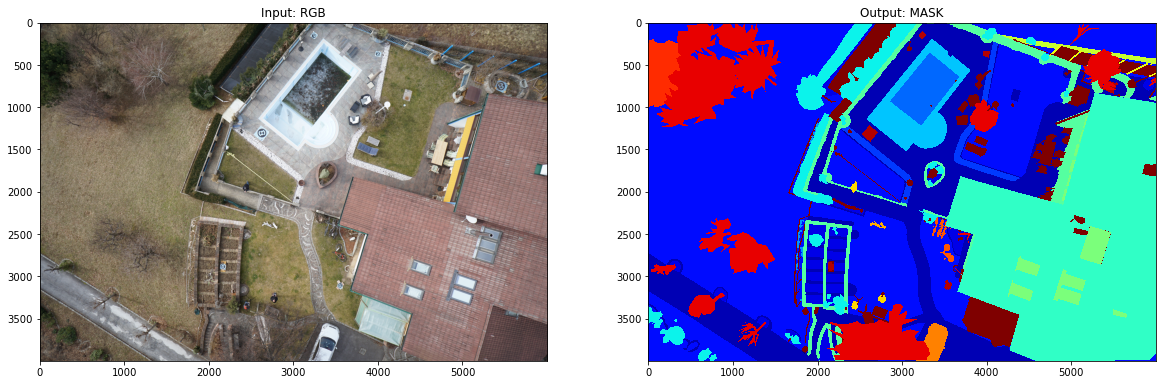

In [543]:

plot_image_pair(img, mask, cmap='jet')

In [520]:
np.unique(mask_np)

 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=uint8)

0:tree
1:gras
2:other-vegetation
3:dirt
4:gravel
5:rocks
6:water
7:paved area
8:pool
9:person
10:dog
11:car
12:bicycle
13:roof
14:wall
15:fence
16:fence-pole
17:window
18:door
19:obstacle
20:unknown
21:unknown
22:unknown


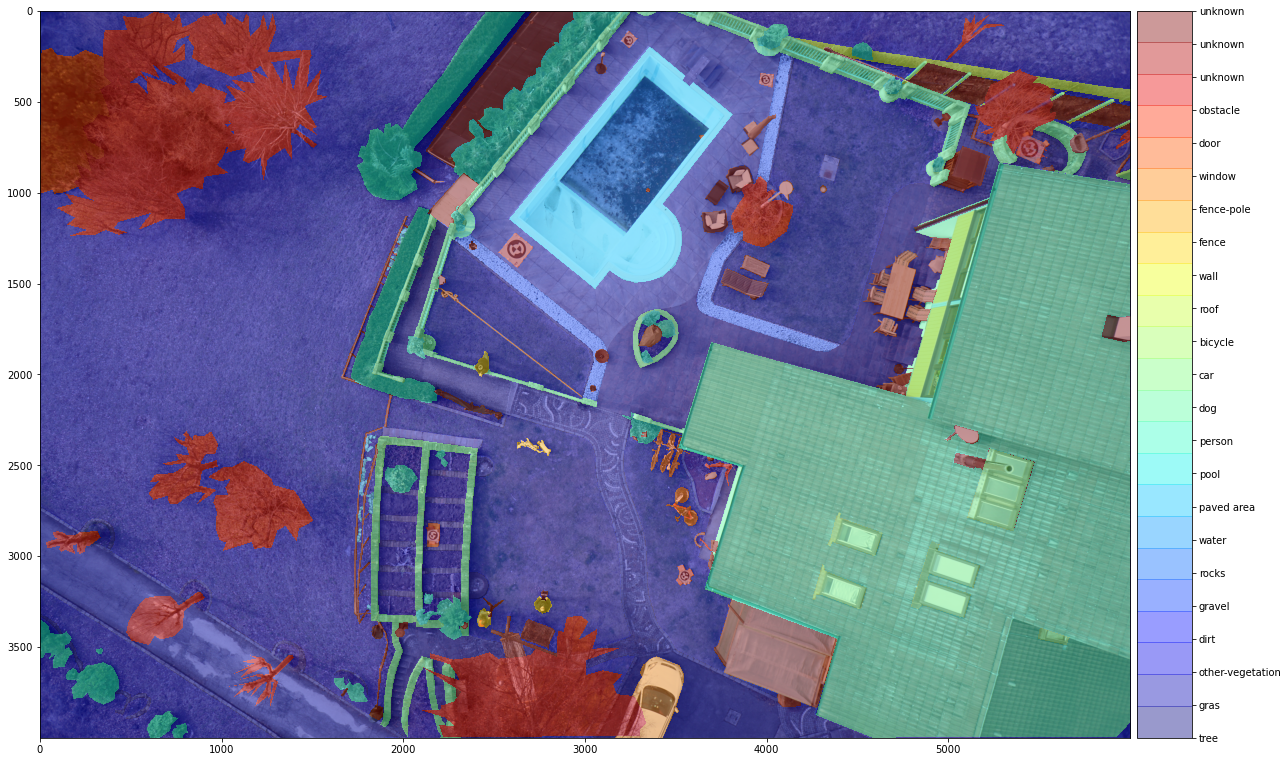

In [541]:
def plot_imageoverlay(pil_img, pil_mask, mask_names, save_dir = 'reports/figures'):
    img_np = np.array(pil_img)
    mask_np = np.array(pil_mask)
    N_cmap = np.max(mask_np)+1
    name_index = list(range(mask_np.min(), N_cmap))

    # extend the labels
    for i in range(len(mask_names), N_cmap):
        mask_names.append("unknown")
    for i in range(N_cmap):
        print(f"{name_index[i]}:{mask_names[i]}")
    fig, ax = plt.subplots(figsize = (18, 12)) # W, H
    ax.imshow(img_np)

    im = ax.imshow(mask_np,  cmap=plt.cm.get_cmap('jet', N_cmap), alpha=0.4,  interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(im, cax=cax, ticks = name_index) 
    cbar.ax.set_yticklabels(mask_names)  # horizontal colorbar
    plt.tight_layout()
    plt.savefig(save_dir +'/sample.png', dpi = 200)
    plt.show()
    return mask_names
    
mask_names_long = plot_imageoverlay(img, mask, mask_names)

In [523]:
img_np = np.array(img)
mask_np = np.array(mask)
img_np.shape, mask_np.shape,img_np.dtype, mask_np.dtype, 

((4000, 6000, 3), (4000, 6000), dtype('uint8'), dtype('uint8'))

In [447]:
len(np.unique(mask_np))

18

In [446]:
np.max(mask_np)

22

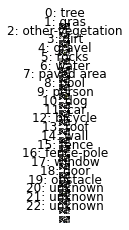

In [417]:
img_np = np.array(img)
mask_np = np.array(mask)
img_np.shape, mask_np.shape
fig  = plt.figure(figsize = (18, 12))
for i in range(mask_np.max() + 1):
    plt.subplot(25,1, i+1)
    threshold = i
    img_overlay = np.ma.masked_where(mask_np == i, mask_np) 
#   img_overlay = np.where(mask_np == i)
    plt.imshow(img_np)
    plt.imshow(img_overlay, cmap=plt.cm.get_cmap('gray', N_cmap), interpolation='none')
    plt.title(f"{i}: {mask_names[i]}")
    plt.axis("off")

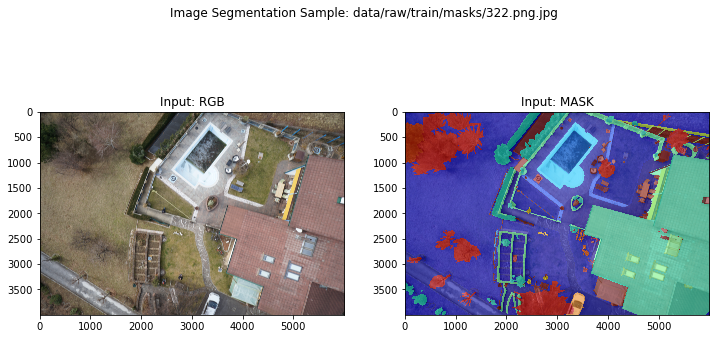

In [526]:
img_overlay = np.ma.masked_where(mask == 0, mask_np)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
fig.suptitle(f'Image Segmentation Sample: {mask_file_name}.jpg')
ax1.imshow(img)
ax1.set_title('Input: RGB')
ax2.imshow(img)
ax2.imshow(img_overlay, cmap='jet', alpha=0.5, interpolation='none')
ax2.set_title('Input: MASK')
plt.show()

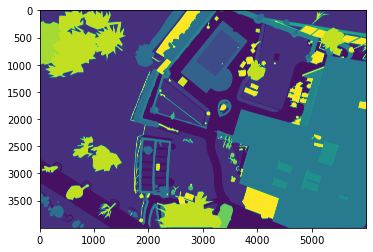

In [527]:
plt.imshow(img_overlay)

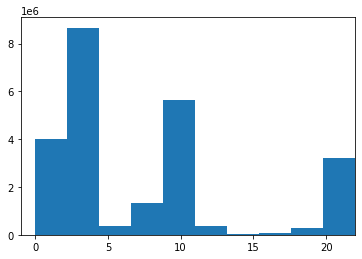

In [528]:
data = np.array(mask).flatten()
counts, bins = np.histogram(data)
plt.hist(bins[:-1], bins, weights=counts, align='mid')

plt.xlim([-1, 22])
plt.show()
# bins = np.arange(20) - 0.5
# plt.hist(np.array(mask).flatten(), bins)


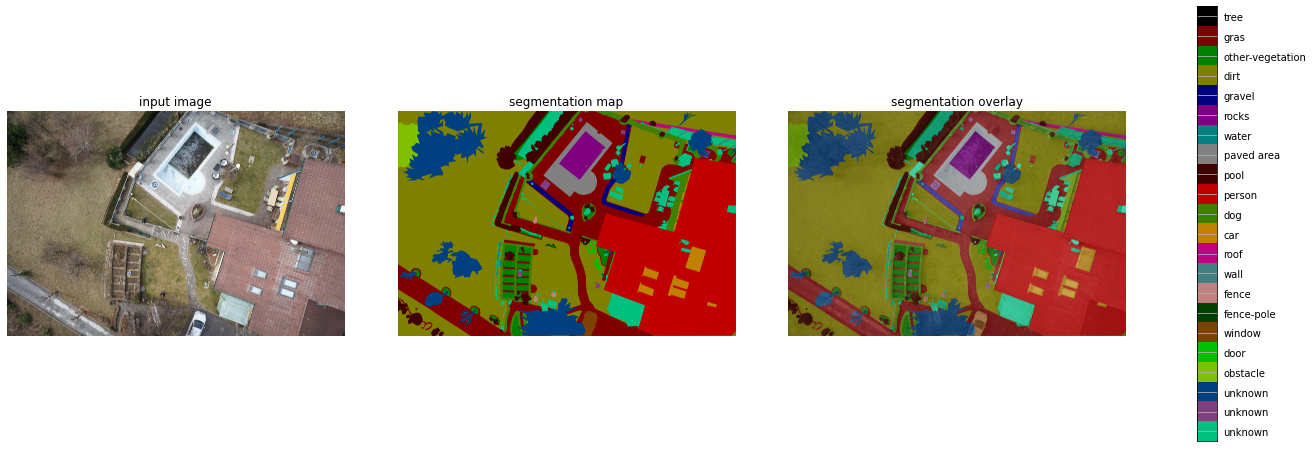

In [531]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
 
def create_pascal_label_colormap():
    """
    PASCAL VOC 分割数据集的类别标签颜色映射label colormap

    返回:
        可视化分割结果的颜色映射Colormap
    """
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    return colormap


def label_to_color_image(label):
    """
    添加颜色到图片，根据数据集标签的颜色映射 label colormap

    参数:
        label: 整数类型的 2D 数组array, 保存了分割的类别标签 label

    返回:
        result: A 2D array with floating type. The element of the array
        is the color indexed by the corresponding element in the input label
        to the PASCAL color map.

    Raises:
        ValueError: If label is not of rank 2 or its value is larger than color
        map maximum entry.
    """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_pascal_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]


def vis_segmentation(image, seg_map):
    """
    输入图片和分割 mask 的可视化.
    """
    plt.figure(figsize=(22, 8))
    grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

    plt.subplot(grid_spec[0])
    plt.imshow(image)
    plt.axis('off')
    plt.title('input image')

    plt.subplot(grid_spec[1])
    seg_image = label_to_color_image(seg_map).astype(np.uint8)
    plt.imshow(seg_image)
    plt.axis('off')
    plt.title('segmentation map')

    plt.subplot(grid_spec[2])
    plt.imshow(image)
    plt.imshow(seg_image, alpha=0.7)
    plt.axis('off')
    plt.title('segmentation overlay')

    unique_labels = np.unique(seg_map)
    ax = plt.subplot(grid_spec[3])
    plt.imshow(FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
    ax.yaxis.tick_right()
    plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
    plt.xticks([], [])
    ax.tick_params(width=0.0)
    plt.grid('off')
    plt.show()
    

    
LABEL_NAMES = np.asarray(mask_names_long) # 假设只有两类
FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

vis_segmentation(img_np, mask_np)


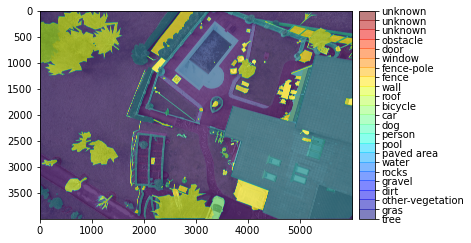

In [530]:
def vis_segmentation2(img_np, mask_np):
    """
    输入图片和分割 mask 的统一可视化.
    """
    N_cmap = mask_np.max() + 1
    name_index = list(range(mask_np.min(), N_cmap))

    seg_image = label_to_color_image(mask_np).astype(np.uint8)
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_np)
    ax.imshow(mask_np, alpha=0.7)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    colormap = create_pascal_label_colormap()
    
    cbar = fig.colorbar(im, cax=cax, ticks = name_index) 
    cbar.ax.set_yticklabels(mask_names_long)   
     
    plt.show() 
    
vis_segmentation2(img_np, mask_np)

In [561]:
import numpy as np

n_labels = 12


targets = np.array(range(12)).reshape((3,4))

ohm = np.zeros((targets.shape[0], targets.shape[1], n_labels))
#empty one-hot matrix
                                      
ohm[np.arange(targets.shape[0], targets.shape[0]), targets] = 1
 

In [562]:
targets

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [563]:
ohm.shape

(3, 4, 12)

In [564]:
ohm

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [593]:
import numpy as np

# the 2d array of our samples,
# each component is a category label
a = np.array([[1,2,1],[1,2,1], [3, 3, 3]])

# the 3d array that will be the one-hot representation
# a.max() + 1 is the number of labels we have
b = np.zeros((a.shape[0], a.shape[1], 10))

# if you visualize this as a stack of layers,
# where each layer is a sample,
# this first index selects each layer separately
layer_idx = np.arange(a.shape[0]).reshape(a.shape[0], 1)

# this index selects each component separately
component_idx = np.tile(np.arange(a.shape[1]), (a.shape[0], 1))

# then we use `a` to select indices according to category label
b[layer_idx, component_idx, a] = 1

# voila!
print(b.shape)

(3, 3, 10)


In [594]:
layer_idx, component_idx,a


(array([[0],
        [1],
        [2]]),
 array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[1, 2, 1],
        [1, 2, 1],
        [3, 3, 3]]))

In [595]:
component_idx

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [596]:
b[:, :, 1]


array([[1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [597]:
b[:, :, 2]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [598]:
b[:, :, 3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [600]:
import torch
bs=16
num_classes=5
H=128
W=128

score=torch.rand(bs,num_classes,H,W)

label=torch.randint(low=0, high=num_classes, size=(bs,H,W))

print("score shape:{},score dtype:{}".format(score.size(),score.dtype))

print("label shape:{},label dtype:{}".format(label.size(),label.dtype))
 


score shape:torch.Size([16, 5, 128, 128]),score dtype:torch.float32
label shape:torch.Size([16, 128, 128]),label dtype:torch.int64


In [602]:
score[0, :, 1, 1]

tensor([0.0917, 0.8399, 0.9725, 0.6687, 0.3024])

In [603]:
label[0, 1, 1]

tensor(1)

In [604]:
label=torch.unsqueeze(label,dim=1)
print("label shape:{},label dtype:{}".format(label.size(),label.dtype))

target=torch.zeros(bs,num_classes,H,W).scatter_(1, label, torch.ones_like(label,dtype=torch.float32))
print("target shape:{},target dtype:{}".format(target.size(),target.dtype))
 

label shape:torch.Size([16, 1, 128, 128]),label dtype:torch.int64
target shape:torch.Size([16, 5, 128, 128]),target dtype:torch.float32


In [607]:
label[0,:, :3, :3]

tensor([[[4, 3, 0],
         [3, 1, 4],
         [3, 4, 2]]])

In [608]:
target[0,:, :3, :3]

tensor([[[0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 1., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]],

        [[0., 1., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]])